In [1]:
import pandas as pd
from scipy import integrate
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (7,5)

# read elapsed_time_ms and current_mA

In [2]:
data_frame = pd.read_csv("tcp_as.csv", sep=" ", names=["elapsed_time_ms", "As"])
data_frame.describe()

,elapsed_time_ms,As
count,100.000000,100.000000
mean,241.570000,0.021031
std,32.115403,0.002591
min,193.000000,0.016300
25%,219.000000,0.019175
50%,236.000000,0.020600
75%,257.000000,0.022325
max,396.000000,0.032600


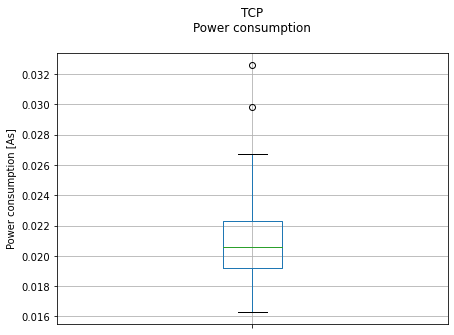

In [3]:
data_frame = pd.read_csv("tcp_as.csv", sep=" ", names=["elapsed_time_ms", ""])
data_frame.boxplot(column="")
plt.title( "TCP\nPower consumption\n" )
plt.ylabel("Power consumption [As]")
plt.show()

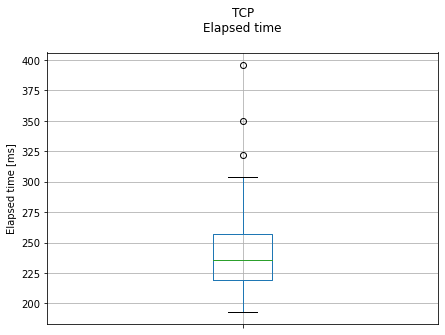

In [4]:
data_frame = pd.read_csv("tcp_as.csv", sep=" ", names=["", "power consumption"])
data_frame.boxplot(column="")
plt.title( "TCP\nElapsed time\n" )
plt.ylabel("Elapsed time [ms]")
plt.show()

In [5]:
data_frame = pd.read_csv("udp_as.csv", sep=" ", names=["elapsed_time_ms", "As"])
data_frame.describe()

,elapsed_time_ms,As
count,100.000000,100.000000
mean,95.970000,0.009227
std,1.058444,0.000581
min,94.000000,0.008200
25%,95.000000,0.008800
50%,96.000000,0.009100
75%,97.000000,0.009600
max,98.000000,0.010900


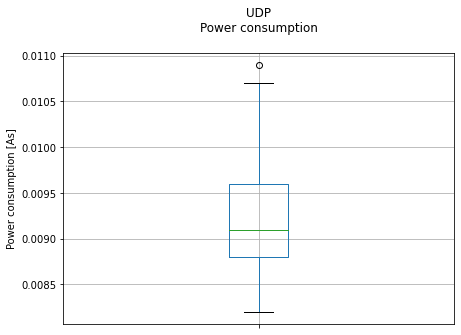

In [6]:
data_frame = pd.read_csv("udp_as.csv", sep=" ", names=["elapsed_time_ms", ""])
data_frame.boxplot(column="")
plt.title( "UDP\nPower consumption\n" )
plt.ylabel("Power consumption [As]")
plt.show()

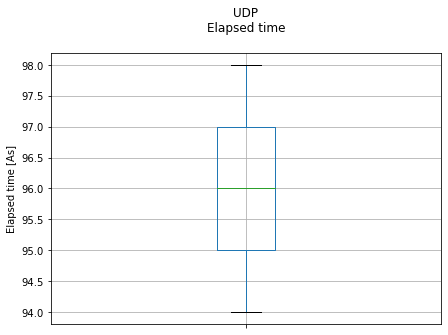

In [7]:
data_frame = pd.read_csv("udp_as.csv", sep=" ", names=["", "power consumption"])
data_frame.boxplot(column="")
plt.title( "UDP\nElapsed time\n" )
plt.ylabel("Elapsed time [As]")
plt.show()

In [8]:
def calc_AmpereSecFromDataFrame(df):
    return integrate.trapz(df.current_mA.div(1000), df.time_ms.div(1000))


def calc_load_coulomb_str(df):
    load = calc_AmpereSecFromDataFrame(df)
    return "Q = {:.4f} [As]".format(load)

# Sending data over tcp

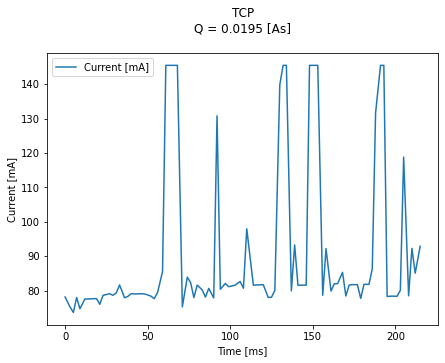

In [9]:
df_tcp = pd.read_csv("tcp/tcp_50.csv", sep=" ", names=["time_ms", "current_mA"])
plt.title("TCP\n" + calc_load_coulomb_str(df_tcp)+"\n")
plt.xlabel("Time [ms]")
plt.ylabel("Current [mA]")
plt.plot(df_tcp.time_ms[:], df_tcp.current_mA[:], label="Current [mA]")
plt.legend()
plt.show()

# Sending data over udp

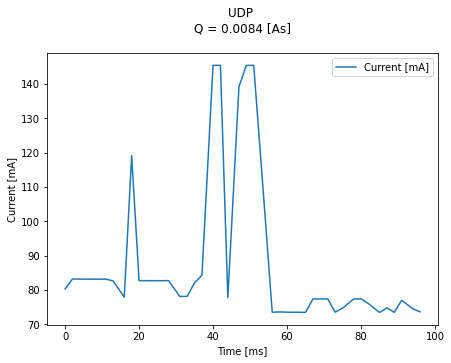

In [10]:
df_udp = pd.read_csv("udp/udp_50.csv", sep=" ", names=["time_ms", "current_mA"])
plt.title("UDP \n" + calc_load_coulomb_str(df_udp)+ "\n")
plt.xlabel("Time [ms]")
plt.ylabel("Current [mA]")
plt.plot(df_udp.time_ms[:], df_udp.current_mA[:], label="Current [mA]")
plt.legend()
plt.show()

In [11]:
data_frame = pd.read_csv("udp_tcp_as.csv", sep=" ", names=["tcp_elapsed_time_ms", "tcp_As", "udp_elapsed_time_ms", "udp_As"])
data_frame.describe()

,tcp_elapsed_time_ms,tcp_As,udp_elapsed_time_ms,udp_As
count,100.000000,100.000000,100.000000,100.000000
mean,241.570000,0.021031,95.970000,0.009227
std,32.115403,0.002591,1.058444,0.000581
min,193.000000,0.016300,94.000000,0.008200
25%,219.000000,0.019175,95.000000,0.008800
50%,236.000000,0.020600,96.000000,0.009100
75%,257.000000,0.022325,97.000000,0.009600
max,396.000000,0.032600,98.000000,0.010900


In [12]:
data_frame = pd.read_csv("udp_tcp_c.csv", sep=" ", names=["As_comp", "ms_comp"])
data_frame.describe()


,As_comp,ms_comp
count,100.000000,100.000000
mean,44.500900,40.333300
std,6.071349,4.722481
min,27.910000,23.990000
25%,41.122500,37.487500
50%,44.030000,40.680000
75%,47.675000,43.727500
max,63.010000,49.750000


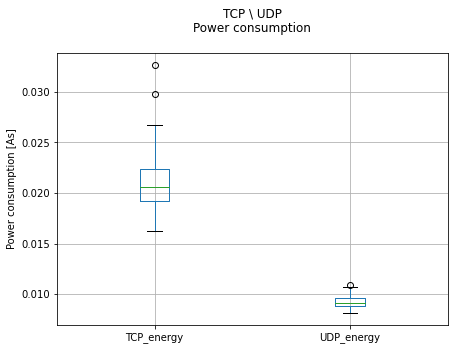

In [22]:
data_frame = pd.read_csv("udp_tcp_as.csv", sep=" ", names=["TCP_duration", "TCP_energy", "UDP_duration", "UDP_energy"])
data_frame.boxplot(column=["TCP_energy","UDP_energy"])
plt.title( "TCP \ UDP\nPower consumption\n" )
plt.ylabel("Power consumption [As]")
plt.show()

In [23]:
data_frame.head()

,TCP_duration,TCP_energy,UDP_duration,UDP_energy
2,250,0.0216,97,0.0095
3,259,0.0221,96,0.0096
4,236,0.0205,96,0.0090
5,211,0.0190,95,0.0086
6,269,0.0233,96,0.0094


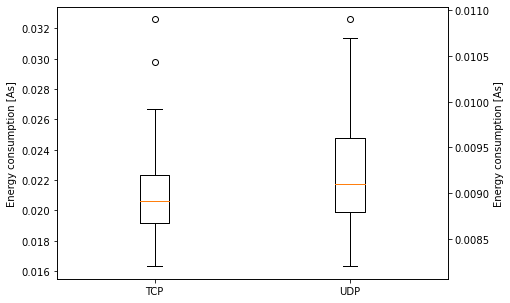

In [25]:
left_positions = [0]
right_positions = [1]

fig1, axis_y = plt.subplots()
axis_y.boxplot(data_frame.TCP_energy, positions = left_positions)
axis_y.tick_params(axis='y')

axis_y2 = axis_y.twinx()
axis_y2.tick_params(axis='y')
box_static = axis_y2.boxplot(data_frame.UDP_energy, positions = right_positions,)
plt.xticks([0, 1], ["TCP", "UDP"])

axis_y.set_ylabel("Energy consumption [As]")
axis_y2.set_ylabel("Energy consumption [As]")

plt.show()

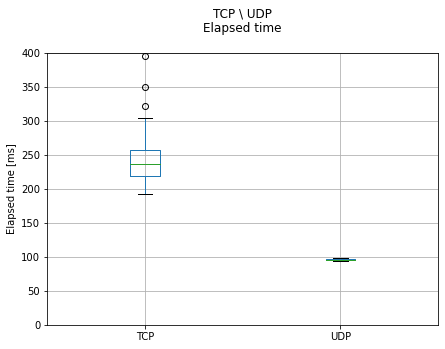

In [15]:
data_frame = pd.read_csv("udp_tcp_as.csv", sep=" ", names=["TCP", "TCP\npower consumption\n[As]", "UDP", "UDP\npower consumption\n[As]"])
data_frame.boxplot(column=["TCP","UDP"])
plt.ylim(0, 400)
plt.title( "TCP \ UDP\nElapsed time\n" )
plt.ylabel("Elapsed time [ms]")
plt.show()

Text(0, 0.5, 'Elapsed time [ms]')

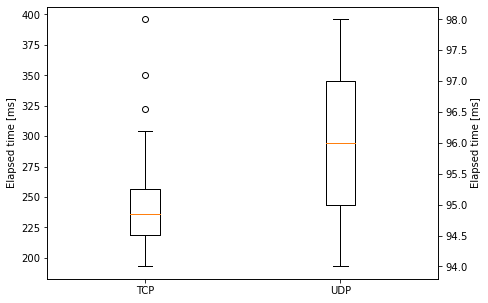

In [26]:
left_positions = [0]
right_positions = [1]

fig1, axis_y = plt.subplots()
axis_y.boxplot(data_frame.TCP_duration, positions = left_positions)
axis_y.tick_params(axis='y')

axis_y2 = axis_y.twinx()
axis_y2.tick_params(axis='y')
box_static = axis_y2.boxplot(data_frame.UDP_duration, positions = right_positions,)
plt.xticks([0, 1], ["TCP", "UDP"])

axis_y.set_ylabel("Elapsed time [ms]")
axis_y2.set_ylabel("Elapsed time [ms]")

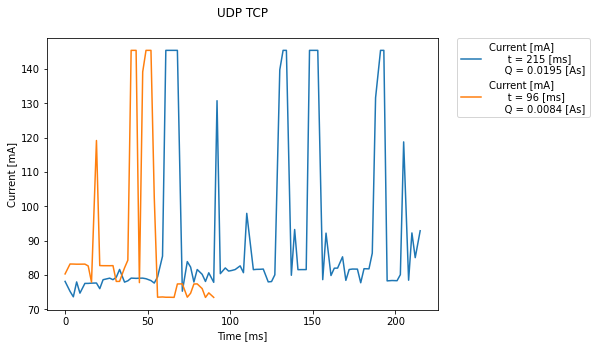

In [16]:

df_udp_tcp = pd.read_csv("tcp_50.csv", sep=" ", names=["time_ms", "tcp_current_mA", "udp_current_mA"])
tcp = pd.read_csv("tcp/tcp_50.csv", sep=" ", names=["time_ms", "current_mA"])
tcp_t = tcp['time_ms'].max() - tcp['time_ms'].min()
udp = pd.read_csv("udp/udp_50.csv", sep=" ", names=["time_ms", "current_mA"])
udp_t = udp['time_ms'].max() - udp['time_ms'].min()
plt.title("UDP TCP\n")
plt.xlabel("Time [ms]")
plt.ylabel("Current [mA]")
plt.plot(df_udp_tcp.time_ms[:], df_udp_tcp.tcp_current_mA[:], label="Current [mA]\n      t = " + str(tcp_t) + " [ms]\n     " + calc_load_coulomb_str(tcp))
plt.plot(df_udp_tcp.time_ms[:], df_udp_tcp.udp_current_mA[:], label="Current [mA]\n      t = " + str(udp_t) +  " [ms]\n     " + calc_load_coulomb_str(udp))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

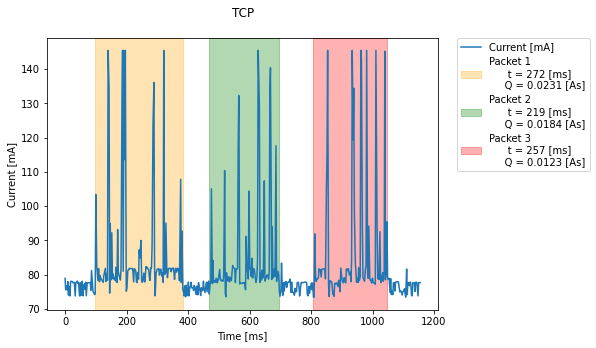

In [17]:
df_tcp = pd.read_csv("tcp_49_51.csv", sep=" ",  names=["time_ms", "current_mA", "sending"])
df_tcp.drop(df_tcp.columns[2], axis=1, inplace=True)
plt.xlabel("Time [ms]")
plt.ylabel("Current [mA]")
plt.plot(df_tcp.time_ms[:], df_tcp.current_mA[:], label="Current [mA]")
plt.axvspan(96, 383, color='orange', alpha=0.3, label="Packet 1 \n      t = " + str(372-100) + " [ms]\n     " + calc_load_coulomb_str(df_tcp[44:160]))
plt.axvspan(468, 695, color='green', alpha=0.3, label="Packet 2 \n      t = " + str(695-476) + " [ms]\n     " + calc_load_coulomb_str(df_tcp[204:297]))
plt.axvspan(808, 1048, color='red', alpha=0.3, label="Packet 3 \n      t = " + str(1054-797) + " [ms]\n     " + calc_load_coulomb_str(df_tcp[341:405]))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title( "TCP\n" )
plt.show()

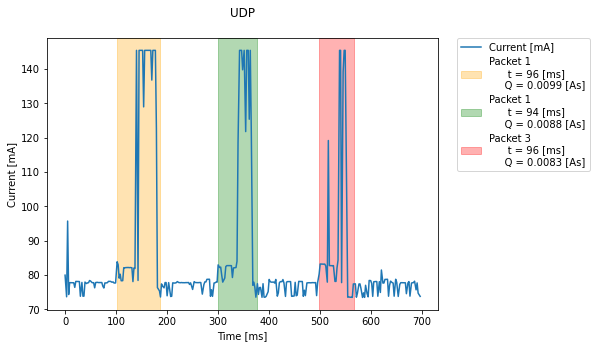

In [18]:
df_udp = pd.read_csv("udp_49_51.csv", sep=" ",  names=["time_ms", "current_mA", "is_sending"])
df_udp.drop(df_udp.columns[2], axis=1, inplace=True)
plt.xlabel("Time [ms]")
plt.ylabel("Current [mA]")
plt.plot(df_udp.time_ms[:], df_udp.current_mA[:], label="Current [mA]")
plt.axvspan(102, 187, color='orange', alpha=0.3, label="Packet 1 \n      t = " + str(198-102) + " [ms]\n     " + calc_load_coulomb_str(df_udp[45:87]))
plt.axvspan(300, 377, color='green', alpha=0.3, label="Packet 1 \n      t = " + str(394-300) + " [ms]\n     " + calc_load_coulomb_str(df_udp[132:173]))
plt.axvspan(498, 567, color='red', alpha=0.3, label="Packet 3 \n      t = " + str(594-498) + " [ms]\n     " + calc_load_coulomb_str(df_udp[217:258]))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title( "UDP\n" )
plt.show()